### Example

Training the model

In [1]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
import SPCE_ParallelGP as SPCE
import time

# Import config file (please check the correct path) 
config_file_path = r"C:/Users/v196m/Desktop/master_project/Masterarbeit/TESTING_ENV/config/config_TEST2_SDOF_SBAGM_6.json"
# Import realization (Y) (please check the correct path)
Y_path = r"C:/Users/v196m/Desktop/master_project/Masterarbeit/TESTING_ENV/InputData/Realization/TEST3_Y_SBAGM_V6_VAL_FIX850_DOE_1000_DIR_Z.mat"
# Specify where the training result will store
save_dir = r"C:/Users/v196m/Desktop/master_project/Masterarbeit/TESTING_ENV/TrainResult/"

# Initialize the SPCE by input config file
Model = SPCE.StochasticPCE(config_file_path, numDOE= None)

# Import realization (Y), please make sure the size of Y matchs input datasets X
Y = sio.loadmat(Y_path)
Realization = np.array([Y["Y"]])[0]
Model.InputRealization(Realization)

# Training the model
Model.BuildModel_SPCE(tol_err=1E-6, show_info_ = False, overfit_count_ = 2,  save_result_ = True, result_path_ = save_dir)

-------------------------------------------------------------------------------
Initialized SPCE successfully
     Using Stochastic PCE solver
     Input X with shape (N,num_Vars): (500, 6)
     Input Y with shape (N,1)       : (0,)
     WARNING, No realization will be inputed when initialize the clase 
           Please use method: InputRealization() to initialize realization Y
 
     Config information: 
   {
    "X_path": "C:/Users/v196m/Desktop/master_project/Masterarbeit/TESTING_ENV/InputData/TEST2_X_SBAGM_V6_VAL_DOE_500_DIR_Z_SPLIT.mat",
    "X_type": {
        "x1": "Gaussian",
        "x2": "Uniform",
        "x3": "Uniform",
        "x4": "Gaussian",
        "x5": "Gaussian",
        "x6": "Gaussian"
    },
    "OrthPolyParams": {},
    "Z_type": [
        "Gaussian"
    ],
    "Solver": "HybridLAR",
    "max_poly_degree": 4,
    "q_norm": [
        0.5,
        0.75,
        1
    ],
    "save_result_path": "C:/Users/v196m/Desktop/master_project/Masterarbeit/StochasticPCE"
}


Prediction 

1. Once the model is trained, the results (JSON files will be stored in specified folder)
2. We import the result of model back to initialize the SPCE again for further prediction.

In [10]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
import SPCE_ParallelGP as SPCE
import time

config_file_path = r"C:/Users/v196m/Desktop/master_project/Masterarbeit/TESTING_ENV/config/config_TEST2_SDOF_SBAGM_6.json"
Y_path = r"C:/Users/v196m/Desktop/master_project/Masterarbeit/TESTING_ENV/InputData/Realization/TEST3_Y_SBAGM_V6_VAL_RAND_DOE_1000_DIR_Z.mat"
save_dir = r"C:/Users/v196m/Desktop/master_project/Masterarbeit/TESTING_ENV/TrainResult/"

Model = SPCE.StochasticPCE(config_file_path, numDOE= None)
Y = sio.loadmat(Y_path)
Realization = np.array([Y["Y"]])[0]
Model.InputRealization(Realization)

# Import the results
Model.Read_result(save_dir,"SPCE_Result_0424013224_Z.json",show_info_= True)

-------------------------------------------------------------------------------
Initialized SPCE successfully
     Using Stochastic PCE solver
     Input X with shape (N,num_Vars): (500, 6)
     Input Y with shape (N,1)       : (0,)
     WARNING, No realization will be inputed when initialize the clase 
           Please use method: InputRealization() to initialize realization Y
 
     Config information: 
   {
    "X_path": "C:/Users/v196m/Desktop/master_project/Masterarbeit/TESTING_ENV/InputData/TEST2_X_SBAGM_V6_VAL_DOE_500_DIR_Z_SPLIT.mat",
    "X_type": {
        "x1": "Gaussian",
        "x2": "Uniform",
        "x3": "Uniform",
        "x4": "Gaussian",
        "x5": "Gaussian",
        "x6": "Gaussian"
    },
    "OrthPolyParams": {},
    "Z_type": [
        "Gaussian"
    ],
    "Solver": "HybridLAR",
    "max_poly_degree": 4,
    "q_norm": [
        0.5,
        0.75,
        1
    ],
    "save_result_path": "C:/Users/v196m/Desktop/master_project/Masterarbeit/StochasticPCE"
}


Validation, checking fix point: 49, 149, 249, 349, 449

-------------------------------------------------------------------------------
Input Realization
Input Realization successfully
     Input X with shape (N,num_Vars): (500, 6)
     Input Y with shape (N,1)       : (500, 1)
-------------------------------------------------------------------------------
Start Prediction, variables X will be overwritten.
Gaussian
-------------------------------------------------------------------------------
Create Information Matrix
Create Information Matrix successfully, shape: (500, 37)
(500, 37)
Generate predicted data, X_pred: ((500, 6), Y_pred: ((500,)).
###############################################################################
-------------------------------------------------------------------------------
Start Compute Wassersein distance.
Quadratic Wasserstein distance: 0.13653806627797882
Wasserstein distance: 0.21949277824167376


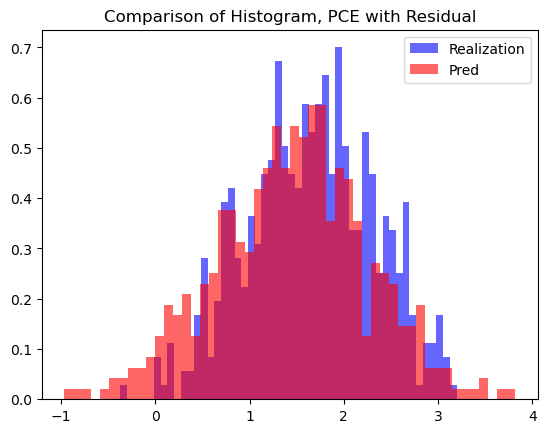

In [11]:
Y_path = r"C:/Users/v196m/Desktop/master_project/Masterarbeit/TESTING_ENV/InputData/Realization/TEST3_Y_SBAGM_V6_VAL_FIX850_DOE_1000_DIR_Z.mat"
Y = sio.loadmat(Y_path)
Realization = np.array([Y["Y"]])[0]
Model.InputRealization(Realization)

# Validation 
valid = Model.X_train[349,:]
a = np.zeros((500,6))
vary_params = np.zeros((500,))

a[:,0] = valid[0]
a[:,1] = valid[1]
a[:,2] = valid[2]
a[:,3] = valid[3]
a[:,4] = valid[4]
a[:,5] = valid[5]

X_pred, Y_pred = Model.Predict_SPCE(load_type = "np_arr",Predict_type = "all_X", input_X = a)
#X_pred, Y_pred = Model.Predict_SPCE(load_type = "mat_file",Predict_type = "all_X", input_X = Model.X_path)
Model.ComputeERROR_WD(Y_pred, Realization)

# Plot the histogram
plt.hist(Realization.flatten(), bins=50, density=True, alpha=0.6, color='b',label = 'Realization')
plt.hist(Y_pred.flatten(), bins=50, density=True, alpha=0.6, color='r',label = 'Pred')
#plt.xlabel('Value')
#plt.ylabel('Frequency')
plt.title('Comparison of Histogram, PCE with Residual')
plt.legend()
plt.show()#

Sensitivity Analysis

-------------------------------------------------------------------------------
Start Sensitivity Analysis
    Current Num of Indices used is 6, max Num is 9


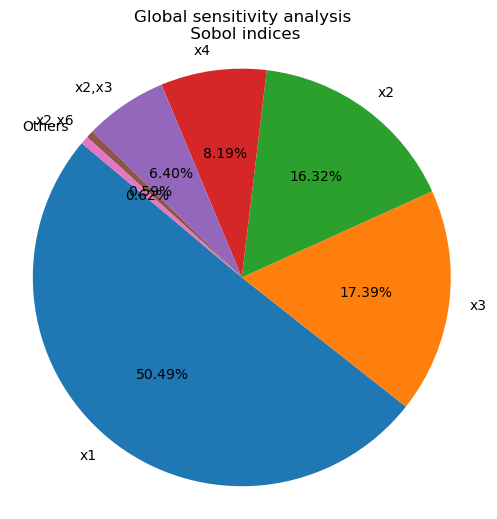

Perform Sensitivity Analysis succesfully


{'x1': 0.5048912158329187,
 'x3': 0.17390518758084764,
 'x2': 0.16323868487687848,
 'x4': 0.08185459910742396,
 'x2,x3': 0.06396428089049792,
 'x2,x6': 0.005939038710096493,
 'Others': 0.006206993001336796}

In [4]:
Model.SensitivityAnalysis(NumIndices= 6, Qol_based= True,show_info_=True)

Response Surface

-------------------------------------------------------------------------------
Start Prediction, variables X will be overwritten.
Gaussian
-------------------------------------------------------------------------------
Create Information Matrix
Create Information Matrix successfully, shape: (625, 37)
(625, 37)
Generate predicted data, X_pred: ((625, 6), Y_pred: ((625,)).
###############################################################################


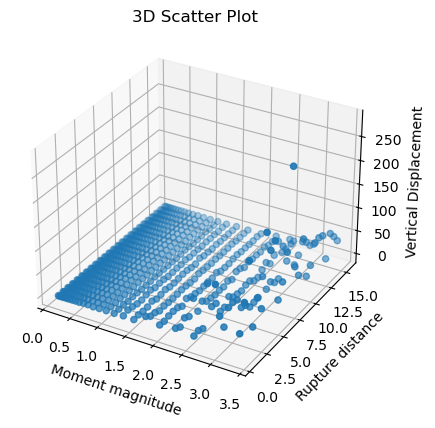

In [5]:
# Define the ranges for x and y
x_range = np.linspace(-3, 3, 25)
y_range = np.linspace(-1, 1, 25)
# Create the mesh grid
X, Y = np.meshgrid(x_range, y_range)
# Flatten the mesh grid
X_flat = np.ravel(X)
Y_flat = np.ravel(Y)

valid = Model.X_train[149,:]
a = np.zeros((625,6))

a[:,0] = X_flat
a[:,1] = Y_flat
a[:,2] = 0
a[:,3] = valid[3]
a[:,4] = valid[4]
a[:,5] = valid[5]

X_pred, Y_pred = Model.Predict_SPCE(load_type = "np_arr",Predict_type = "all_X", input_X = a)

# Create 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(np.exp(-0.378+ 0.53*X_pred[:,0]), 8+7.5*X_pred[:,1], np.exp(Y_pred))

# Add labels and title
ax.set_xlabel('Moment magnitude')
ax.set_ylabel('Rupture distance')
ax.set_zlabel('Vertical Displacement')
ax.set_title('3D Scatter Plot')

# Show plot
plt.show()



Fragility Analysis

-------------------------------------------------------------------------------
Input Realization
    Error from InputRealization(): Array shape is (500, 1). Expected shape is (100, 1).
-------------------------------------------------------------------------------
Start Prediction, variables X will be overwritten.
Gaussian
-------------------------------------------------------------------------------
Create Information Matrix
Create Information Matrix successfully, shape: (500, 37)
(500, 37)
Generate predicted data, X_pred: ((500, 6), Y_pred: ((500,)).
###############################################################################
-------------------------------------------------------------------------------
Start Compute Wassersein distance.
Quadratic Wasserstein distance: 0.015331155927834439
Wasserstein distance: 0.07704902150247098


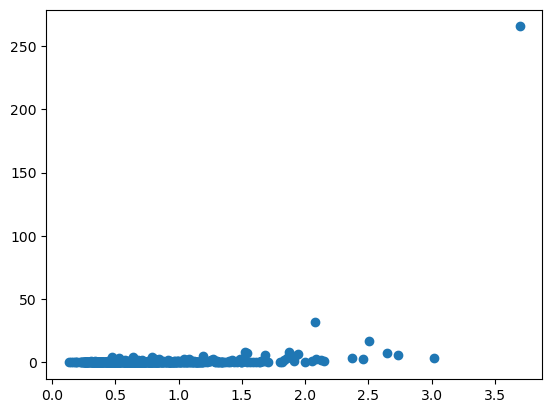

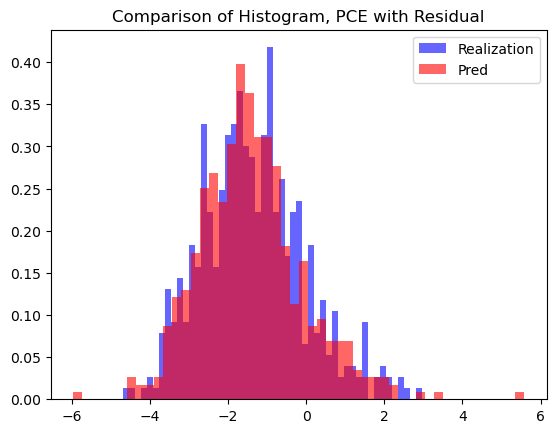

In [13]:
from mpl_toolkits.mplot3d import Axes3D

Y_path = r"C:/Users/v196m/Desktop/master_project/Masterarbeit/TESTING_ENV/InputData/Realization/TEST3_Y_SBAGM_V6_VAL_RAND_DOE_1000_DIR_Z.mat"
Y = sio.loadmat(Y_path)
Realization = np.array([Y["Y"]])[0]
Model.InputRealization(Realization)

# Generate new sampling points 
a = np.zeros((10000,6))
vary_params = np.zeros((10000,))
a[:,0] = np.random.normal(loc=0, scale=1, size=vary_params.shape)
a[:,1] = np.random.uniform(low=-1, high=1,size=vary_params.shape)
a[:,2] = np.random.uniform(low=-1, high=1,size=vary_params.shape)
a[:,3] = np.random.normal(loc=0, scale=1, size=vary_params.shape)
a[:,4] = np.random.normal(loc=0, scale=1, size=vary_params.shape)
a[:,5] = np.random.normal(loc=0, scale=1, size=vary_params.shape)

#X_pred, Y_pred = Model.Predict_SPCE(load_type = "np_arr",Predict_type = "all_X", input_X = a)
X_pred, Y_pred = Model.Predict_SPCE(load_type = "mat_file",Predict_type = "all_X", input_X = Model.X_path)
Model.ComputeERROR_WD(Y_pred, Realization)


# Obtain indices that would sort array1 based on the values of the first column
sorted_indices = np.argsort(X_pred[:, 0])

# Sort both arrays based on the sorted indices
sorted_X_pred = X_pred[sorted_indices]
sorted_Y_pred = Y_pred[sorted_indices]

#print(sorted_X_pred)
plt.scatter(np.exp(-0.378+ 0.53*sorted_X_pred[:,0]),np.exp(sorted_Y_pred))
plt.show()


# Plot the histogram
plt.hist(Realization.flatten(), bins=50, density=True, alpha=0.6, color='b',label = 'Realization')
plt.hist(Y_pred.flatten(), bins=50, density=True, alpha=0.6, color='r',label = 'Pred')
#plt.xlabel('Value')
#plt.ylabel('Frequency')
plt.title('Comparison of Histogram, PCE with Residual')
plt.legend()
plt.show()


def DIN4150_2_Eval(Vmax_array):
    KB_max = (0.8/(np.sqrt(2)*np.sqrt(1 + np.power((5.6/14),2)))) * Vmax_array
    return KB_max


def FragilityCurve3D(model, Threshold, DIN_type):
    num_repeat = 100
    x_range = np.linspace(-2, 2, 20)
    y_range = np.linspace(-1, 1, 20)
    # Create the mesh grid
    X, Y = np.meshgrid(x_range, y_range)
    # Flatten the mesh grid
    X_flat = np.ravel(X)
    Y_flat = np.ravel(Y)

    valid = Model.X_train[149,:]
    a = np.zeros((num_repeat,6))
    result = None
    
    for i in range(len(X_flat)):
        a[:,0] = X_flat[i]
        a[:,1] = Y_flat[i]
        a[:,2] = 0
        a[:,3] = valid[3]
        a[:,4] = valid[4]
        a[:,5] = valid[5]
        X_pred, Y_pred = model.Predict_SPCE(load_type = "np_arr",Predict_type = "all_X", input_X = a)

        if DIN_type == 2:
            KB_max = (0.8/(np.sqrt(2)*np.sqrt(1 + np.power((5.6/14),2)))) * np.exp(Y_pred)
            indices = np.where(KB_max >= Threshold)[0]
        elif DIN_type == 3:
            indices = np.where((Y_pred) >= Threshold)[0]

        # Check if combined_array is null
        if result is None:
            # Initialize combined_array with array1 if it is null
            result = np.array([X_pred[0,0], X_pred[0,1], len(indices)/num_repeat])
        else:
            # Append array1 horizontally to combined_array
            result = np.vstack((result, np.array([X_pred[0,0], X_pred[0,1], len(indices)/num_repeat])))

    X_plot = X_flat.reshape(X.shape)
    Y_plot = Y_flat.reshape(Y.shape)
    # Reshape Z to match the shape of X and Y
    Z = result[:,2]
    Z = Z.reshape(X.shape)

    # Plot the surface
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    surf  = ax.plot_surface(np.exp(-0.378+ 0.53*X), 8+7.5*Y, Z, cmap='viridis', alpha=0.5)
    # Add color bar
    #fig.colorbar(surf, shrink=0.5, aspect=5)

    #surf = ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.7)

    # Modify colors based on Z values
    norm = plt.Normalize(Z.min(), Z.max())
    colors = plt.cm.viridis(norm(Z))

    # Modify 3D shape based on Z values
    ax.plot_surface(np.exp(-0.378+ 0.53*X), 8+7.5*Y, Z, facecolors=colors,antialiased=True, linewidth=0)

    # Add color bar
    mappable = plt.cm.ScalarMappable(cmap='viridis', norm=norm)
    mappable.set_array(Z)
    fig.colorbar(mappable, shrink=0.5, aspect=10)

    # Add labels and title
    ax.set_xlabel('Moment magnitude')
    ax.set_ylabel('Rupture distance')
    ax.set_zlabel('Probability')
    ax.set_title('3D Surface Plot')

    # Show plot
    plt.show()

#KB_eval = DIN4150_2_Eval(np.exp(sorted_Y_pred))
#plt.scatter(sorted_X_pred[:,0],KB_eval)
#plt.show()


#FragilityCurve3D(Model,2.9,3)

